In [1]:
import argparse
from datetime import datetime
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import torch

NameError: name 'x2' is not defined

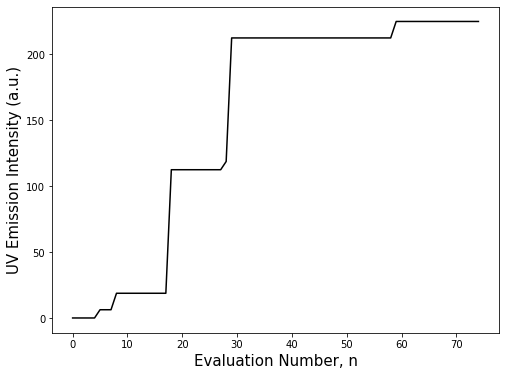

In [3]:
DATA_DEST1 = "./../saved_data/simulation_log_YbErTm_UV_logEmission_beta=5.csv"
df1 = pd.read_csv(DATA_DEST1)

def get_MaxSoFar(df):
    evalued = len(df)
    max_ems = []
    for i in range(evalued):
        max_ems.append(df.iloc[0:i+1].UV.max())
    x = range(len(max_ems)) 
    return x, max_ems

x1, y1 = get_MaxSoFar(df1)



fig, ax = plt.subplots(figsize=(8, 6))

l1=ax.plot(x1, y1, c='black', alpha = 1)


FontSize = 15

# # Ask matplotlib for the plotted objects and their labels. 
# # This is to make labels of ax1 and ax2 show in one legend.
# lines, labels = ax.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax2.legend(lines + lines2, labels + labels2, loc='lower right', ncol=2, fontsize = 13, frameon = True)


ax.set_xlabel('Evaluation Number, n', fontsize = FontSize)
ax.set_ylabel('UV Emission Intensity (a.u.)', fontsize = FontSize)

#ax2.tick_params(axis='y', color='r')
#ax2.spines['right'].set_color('red') 
#plt.setp(ax2.get_yticklabels(), visible=False)
#x = range(max(len(x1)-10,len(x2)-10,len(x3)-10))
# plt.axvspan(x[0]-x[-1]*0.05, 9.5, color='#00A1FF', alpha=0.19)
# plt.axvspan(9.5, x[-1]+x[-1]*0.05, color='#F8CF6A', alpha=0.19)
#plt.xlim([x[0]-x[-1]*0.05,x[-1]+x[-1]*0.05])
plt.show()


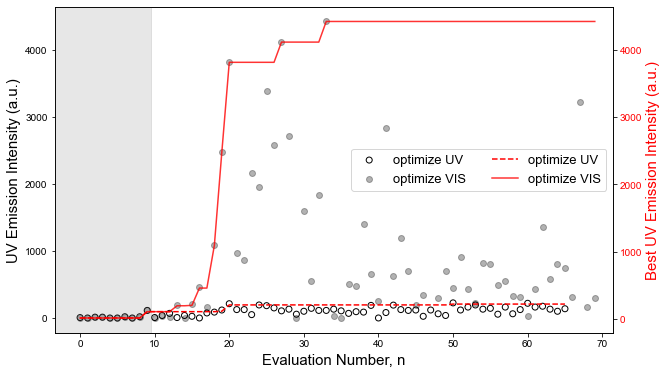

In [13]:
plt.rcParams["font.family"] = "arial"

# optimization progress: result of each iteration and best results
# to compare optimizations with the same initial dataset but different beta values
#DATA_DEST = "../saved_data/simulation_log_YbErTm_logEmission_beta=5.csv"
DATA_DEST = "../saved_data/simulation_log_YbErTm_UV_logEmission_beta=5.csv"
DATA_DEST2 = "../saved_data/simulation_log_YbErTm_logEmission_beta=5.csv"
df = pd.read_csv(DATA_DEST)
df_0p5 = pd.read_csv(DATA_DEST2)

evalued = len(df)
max_uv = []
y = df.UV

evalued_2 = len(df_0p5)
max_uv_2 = []
y_2 = df_0p5.UV

for i in range(evalued):
    max_uv.append(df.iloc[0:i+1].UV.max())
x = range(len(max_uv))   

for i in range(evalued_2):
    max_uv_2.append(df_0p5.iloc[0:i+1].UV.max())
x_2 = range(len(max_uv_2)) 

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

s1=ax1.scatter(x[:-9], y[9:], facecolors='none', edgecolors='black', alpha = 1, marker='o', label='optimize UV')
l1=ax2.plot(x[:-9], max_uv[9:], c='r', alpha = 1, linestyle='dashed',label='optimize UV')
s2=ax1.scatter(x_2[:-9], y_2[9:], c='black', alpha = 0.3, label='optimize VIS')
l2=ax2.plot(x_2[:-9], max_uv_2[9:], c='r', alpha = 0.8, label='optimize VIS')


FontSize = 15

# Ask matplotlib for the plotted objects and their labels. 
# This is to make labels of ax1 and ax2 show in one legend.
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='center right', ncol=2, fontsize = 13, frameon = True)


ax1.set_xlabel('Evaluation Number, n', fontsize = FontSize)
ax1.set_ylabel('UV Emission Intensity (a.u.)', fontsize = FontSize)
ax2.set_ylabel('Best UV Emission Intensity (a.u.)', color='r', fontsize = FontSize)

#ax2.tick_params(axis='y', color='r')
#ax2.spines['right'].set_color('red') 
#plt.setp(ax2.get_yticklabels(), visible=False)
x = range(max(len(x),len(x_2))-10)
plt.setp(ax2.get_yticklabels(), color="red")
plt.axvspan(x[0]-x[-1]*0.05, 9.5, color='grey', alpha=0.19)
#plt.axvspan(9.5, x[-1]+x[-1]*0.05, color='#F8CF6A', alpha=0.19)
plt.xlim([x[0]-x[-1]*0.05,x[-1]+x[-1]*0.05])
plt.savefig('SI_optimize_UV_directly.pdf') 